<a href="https://colab.research.google.com/github/sk27110/basic_ml_hse/blob/task_2_intro_ml/homework_02_pandas_again_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основы машинного обучения, ПАДиИИ

## НИУ ВШЭ, 2024-25 учебный год

# Домашнее задание 2. Анализ данных

Задание выполнил(а):
Кочетков Александр


## Общая информация

__Внимание!__  

Домашнее задание выполняется самостоятельно. Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов. Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) за рамками справочной и образовательной информации для генерации кода задания — считается плагиатом, и такое домашнее задание оценивается в 0 баллов.

Каждое задание весит 1 балл. Всего в сумме можно получить, если правильно решить все задания, 20 баллов.

# Домашнее задание 2. Анализ данных

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm

In [2]:
DIABETS = 'https://raw.githubusercontent.com/evgpat/datasets/main/pima_indians_diabetes.csv'
BABIES = 'https://raw.githubusercontent.com/evgpat/datasets/main/babies_all.txt'

# Часть 1

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [3]:
data = pd.read_csv(DIABETS)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

## Задание 1

Как вы видите, в данных много пропусков (NaN). Любым способом посчитайте количество пропусков в каждом из столбцов.

Для тех переменных, в которых есть пропуски, выведите количество пропущенных значений в следующем формате:

**"В переменной {название переменной} {количество} пропущенных значений"**

In [5]:
for i, j in zip(data.isnull().sum().index, data.isnull().sum().values):
  if(j!=0):
    print(f'В переменной {i} {j} пропущенных значений')


В переменной Glucose 5 пропущенных значений
В переменной BloodPressure 35 пропущенных значений
В переменной SkinThickness 227 пропущенных значений
В переменной Insulin 374 пропущенных значений
В переменной BMI 11 пропущенных значений


## Задание 2

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [7]:
discrete_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','Age']
continuous_columns = ['BMI', 'DiabetesPedigreeFunction']

for i in discrete_columns:
  data[i].fillna(data[i].median(), inplace=True)
for i in continuous_columns:
  data[i].fillna(data[i].mean(), inplace=True)
data.isnull().sum()

<ipython-input-7-ee73bb795b60>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].median(), inplace=True)
<ipython-input-7-ee73bb795b60>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Class,0


## Задание 3

Выведите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [10]:
display(data.describe())
print("Дисперсия:")
display(data.var())
print("Квантили:")
display(data.quantile())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Дисперсия:


,0
Pregnancies,11.354056
Glucose,926.489244
BloodPressure,146.328741
SkinThickness,77.285567
Insulin,7462.033002
BMI,47.267706
DiabetesPedigreeFunction,0.109779
Age,138.303046
Class,0.227483


Квантили:


,0.5
Pregnancies,3.0000
Glucose,117.0000
BloodPressure,72.0000
SkinThickness,29.0000
Insulin,125.0000
BMI,32.4000
DiabetesPedigreeFunction,0.3725
Age,29.0000
Class,0.0000


## Задание 4

У скольких женщин старше 50 лет обнаружен диабет?

In [11]:
data[(data['Age']>50) & (data['Class'] == 1)].shape[0]

38

## Задание 5

Найдите трех женщин с наибольшими числом беременностей.

In [12]:
data.nlargest(3, 'Pregnancies')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


## Задание 6

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [ ]:
data[(data['Age']>=30) & (data['Age']<=40) & (data['Pregnancies'] >=3)].shape[0]

142

## Задание 7

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [13]:
print(f"{data[(data['BloodPressure'] >=80) & (data['BloodPressure']<=89)].shape[0]/data.shape[0]*100:.2f}%")

18.88%


## Задание 8

Считается, что BMI >= 30 - это признак ожирения.
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [ ]:
mean_bloodpressure = data['BloodPressure'].mean()
data[(data['BMI'] >= 30) & (data['BloodPressure']>mean_bloodpressure)].shape[0]

251

## Задание 9

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет.

In [ ]:
data.groupby('Class')[['Glucose', 'BloodPressure', 'Insulin']].mean()

,Glucose,BloodPressure,Insulin
Class,,,
0,110.682000,70.920000,127.792000
1,142.130597,75.123134,164.701493


In [ ]:
print("Среднее значение глюкозы с диабетом:", data[data['Class']==1]['Glucose'].mean())
print("Среднее значение глюкозы без диабета:", data[data['Class']==0]['Glucose'].mean())

Среднее значение глюкозы с диабетом: 142.13059701492537
Среднее значение глюкозы без диабета: 110.682


In [ ]:
print("Среднее значение глюкозы с диабетом:", data[data['Class']==1]['BloodPressure'].mean())
print("Среднее значение глюкозы без диабета:", data[data['Class']==0]['BloodPressure'].mean())

Среднее значение глюкозы с диабетом: 75.1231343283582
Среднее значение глюкозы без диабета: 70.92


In [ ]:
print("Среднее значение глюкозы с диабетом:", data[data['Class']==1]['Insulin'].mean())
print("Среднее значение глюкозы без диабета:", data[data['Class']==0]['Insulin'].mean())

Среднее значение глюкозы с диабетом: 164.70149253731344
Среднее значение глюкозы без диабета: 127.792


## Задание 10

Постройте гистограммы для любых двух количественных признаков.

Text(0, 0.5, 'Количество')

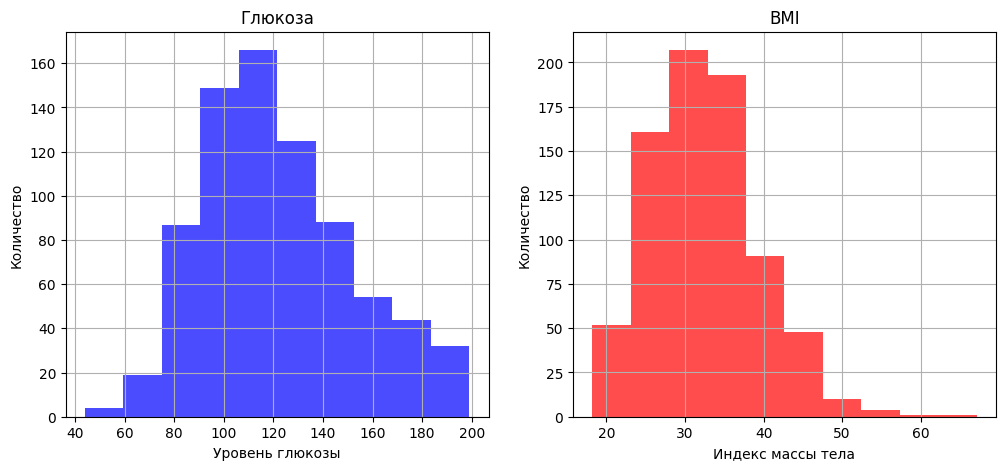

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1,2, figsize=(12,5))
data['Glucose'].hist(bins=10, color='blue', alpha=0.7, ax=axis[0])
axis[0].set_title('Глюкоза')
axis[0].set_xlabel('Уровень глюкозы')
axis[0].set_ylabel('Количество')
data['BMI'].hist(bins=10, color='red', alpha=0.7, ax=axis[1])
axis[1].set_title('BMI')
axis[1].set_xlabel('Индекс массы тела')
axis[1].set_ylabel('Количество')

## Задание 11

Постройте круговую диаграмму для признака __Class__.

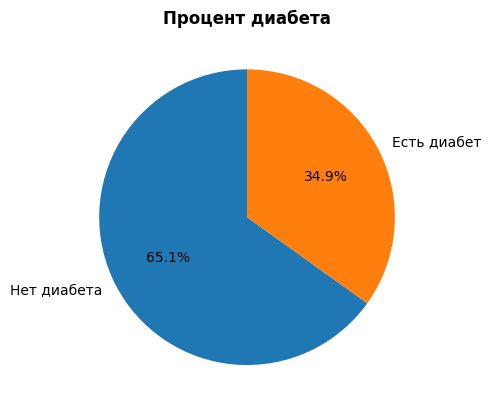

In [15]:
labels = ['Нет диабета', 'Есть диабет']
plt.pie(data['Class'].value_counts().values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Процент диабета', fontweight='bold')
plt.show()

## Задание 12

Постройте распределение для признака __BMI__ и сравните его с нормальным (напишите вывод в новой markdown-ячейке под графиками)

<ipython-input-23-acccfef2cd62>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['BMI'], color='red', shade =True, linewidth=3)


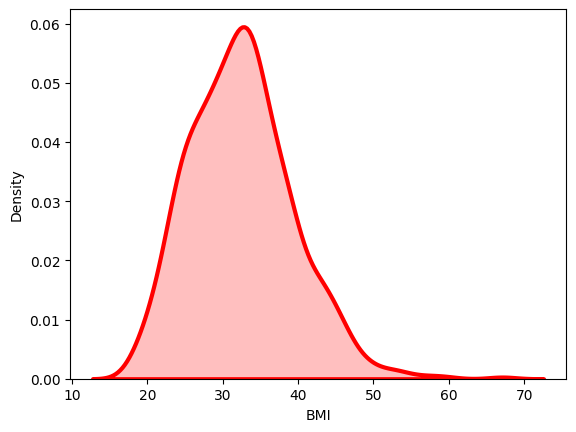

In [23]:
from scipy.stats import norm
import numpy as np
sns.kdeplot(data['BMI'], color='red', shade =True, linewidth=3)
plt.show()

Постройте нормальное распределение поверх графика.

<ipython-input-24-f4b24285df73>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['BMI'], color='red', shade =True, linewidth=3)


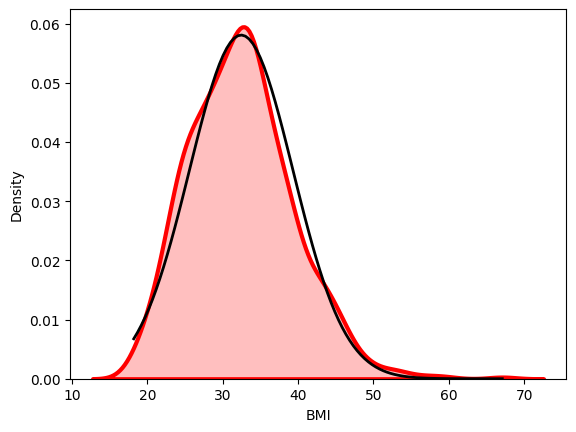

In [24]:
from scipy.stats import norm
import numpy as np
sns.kdeplot(data['BMI'], color='red', shade =True, linewidth=3)

mu, std = norm.fit(data['BMI'])
x = np.linspace(min(data['BMI']), max(data['BMI']), 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'black', linewidth=2, label='Нормальное распределение');

plt.show()

Как мы видим, распределение данных похоже на нормальное

## Задание 13

Постройте следующий график: процент больных диабетом в зависимости от числа беременностей.

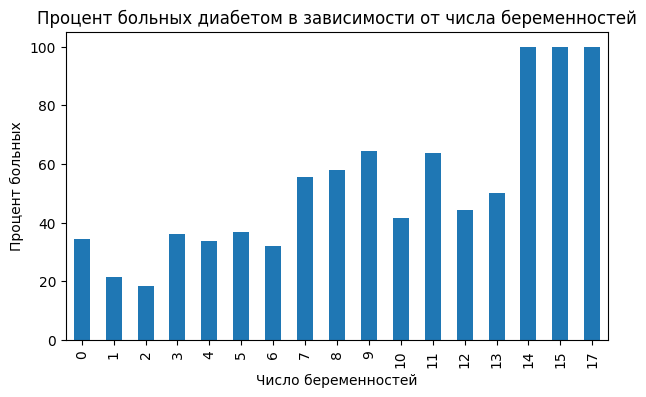

In [25]:
import pandas as pd
import numpy as np

x = data.groupby('Pregnancies')['Class'].mean()*100 #так как класс это 0 или 1 то как раз посчитаем процент больных для каждой группы
plt.figure(figsize=(7,4))
x.plot(kind='bar')
plt.title('Процент больных диабетом в зависимости от числа беременностей')
plt.ylabel('Процент больных')
plt.xlabel('Число беременностей')
plt.show()




## Задание 14

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [26]:
data['wasPregnant'] = data.apply(lambda x: 1 if x['Pregnancies'] > 0 else 0, axis = 1)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,1
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0


## Задание 15

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [27]:
print((data.groupby('wasPregnant').mean()*100)['Class'][0], '-- не больны диабетом')
print((data.groupby('wasPregnant').mean()*100)['Class'][1], '-- больны диабетом')

# print(data[(data['Class']==1) & (data['wasPregnant'] == 1)].shape[0] / data[data['wasPregnant'] == 1].shape[0]) #ну или так тоже можно

34.234234234234236 -- не больны диабетом
35.0076103500761 -- больны диабетом


## Задание 16

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__
    
Underweight = <18.5

Normal weight = 18.5–24.9

Overweight = 25–29.9

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [30]:
def f(x):
    if x < 18.5:
        return 'Underweight'
    elif 18.5 <= x <= 24.9:
        return 'Normal weight'
    elif 25 <= x <= 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

data['bodyType'] = data['BMI'].apply(f)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant,bodyType
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1,Obesity
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,1,Overweight
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,1,Normal weight
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,Obesity


## Задание 17

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [31]:
data[(data['bodyType'] == 'Normal weight') & (data['BloodPressure'] >=80) & (data['BloodPressure']<=89) & (data['Class'] == 1)].shape[0]/data[(data['bodyType'] == 'Normal weight') & (data['BloodPressure'] >=80) & (data['BloodPressure']<=89)].shape[0]

0.1

# Часть 2

In [32]:
babies = pd.read_csv(BABIES, index_col=0)
babies.head(10)

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


## Задание 1

Исследуйте набор данных `babies`. Ответьте на вопросы.

1. Какие годы включает датасет

2. Какое имя в датасете находится по индексом 121?

3. Cколько всего родилось детей по имени 'Aaron' за все время?

4. Насколько больше за все время родилось мальчиков чем девочек?

5. Cколько мальчиков родилось в 2010?

6. Сколько в датасете девочек по имени John?

In [39]:
#1
print("1", babies['year'].unique())
#2
print("2", babies.iloc[121]['name'])
#3
print("3", babies[babies['name'] == 'Aaron']['number'].sum())
#4
print("4", "Мальчиков", babies[babies['sex'] == 'M']['number'].sum(), "Девочек", babies[babies['sex'] == 'F']['number'].sum(), "Разница", babies[babies['sex'] == 'M']['number'].sum() - babies[babies['sex'] == 'F']['number'].sum() )
#5
print("5", babies[(babies['sex'] == 'M') & (babies['year'] == 2010)]['number'].sum())
#6
print('6', babies[(babies['sex'] == 'F') & (babies['name'] == 'John')]['number'].sum())

1 [1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893
 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907
 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921
 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010]
2 Ann
3 527668
4 Мальчиков 162412587 Девочек 159990140 Разница 2422447
5 1898382
6 21578


## Задание 2

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: baby_girls и baby_boys.

2. Создайте фигуру matplotlib с 3 графиками один под другим.

3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y.

4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.

5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.

6. Кратко опишите тренды в ячейке markdown под графиками.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут `.index`

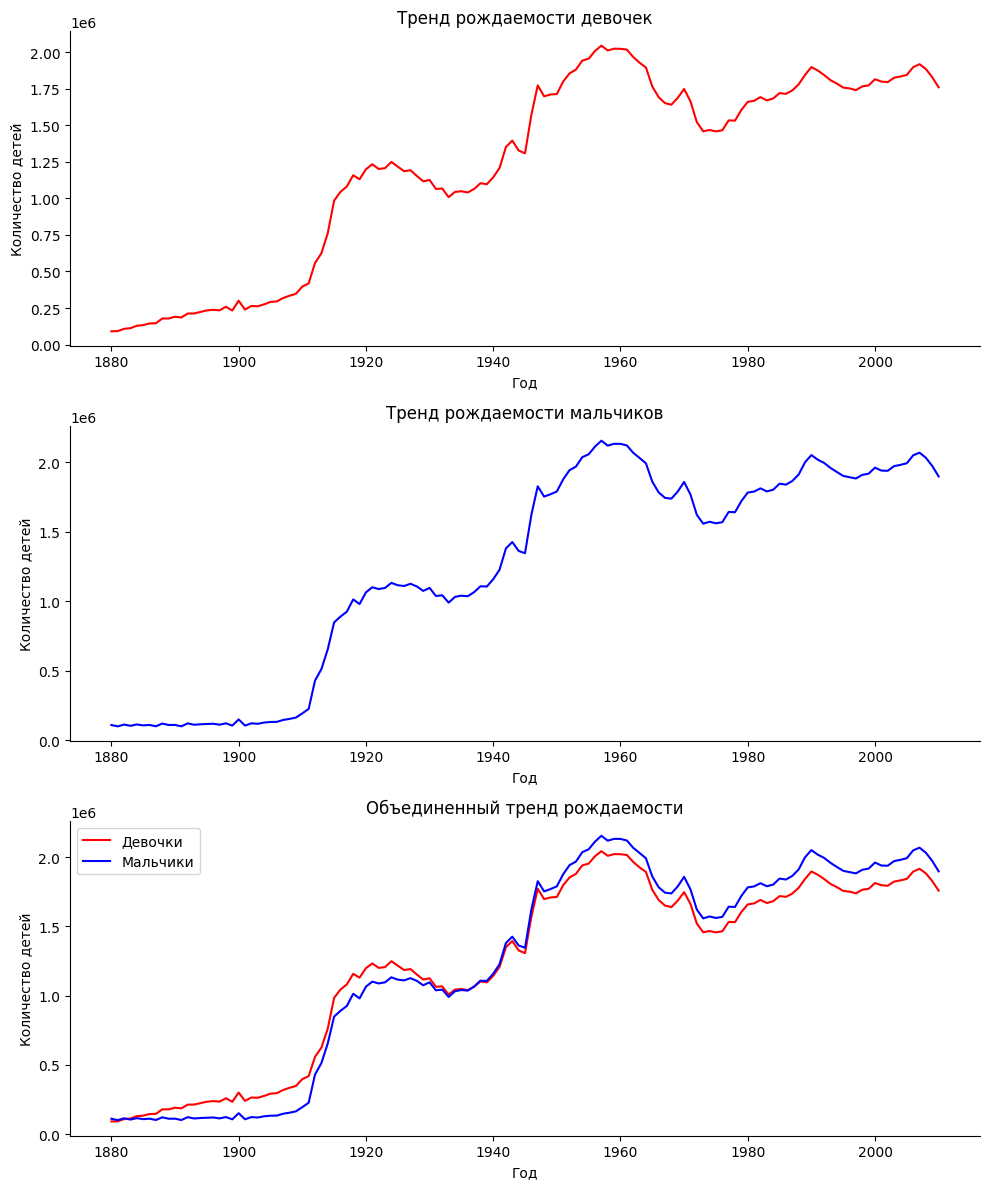

In [66]:
group = babies.groupby(['year', 'sex'])['number'].sum().reset_index()

girls = group[group['sex'] == 'F']
boys = group[group['sex'] == 'M']

fig, axis = plt.subplots(3, 1, figsize=(10, 12))

axis[0].plot(girls['year'], girls['number'], color='red', label='Девочки')
axis[0].set_title('Тренд рождаемости девочек')

axis[1].plot(boys['year'], boys['number'], color='blue', label='Мальчики')
axis[1].set_title('Тренд рождаемости мальчиков')

axis[2].plot(girls['year'], girls['number'], color='red', label='Девочки')
axis[2].plot(boys['year'], boys['number'], color='blue', label='Мальчики')
axis[2].set_title('Объединенный тренд рождаемости')
axis[2].legend()

for i in range(3):
  axis[i].spines['top'].set_visible(False)
  axis[i].spines['right'].set_visible(False)
  axis[i].set_xlabel('Год')
  axis[i].set_ylabel('Количество детей')

plt.tight_layout()
plt.show()

## Задание 3

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).

2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные, сколько детей с таким именем рождалось каждый год.

3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.

4. Постройте 4 линейных графика - тренд для каждого имени за все время.

5. Каждый график должен содержать легенду, один общий заголовок, шкалы графиков должны быть подписаны.

6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.

7. Опишите тренды в ячейке markdown под графиками.

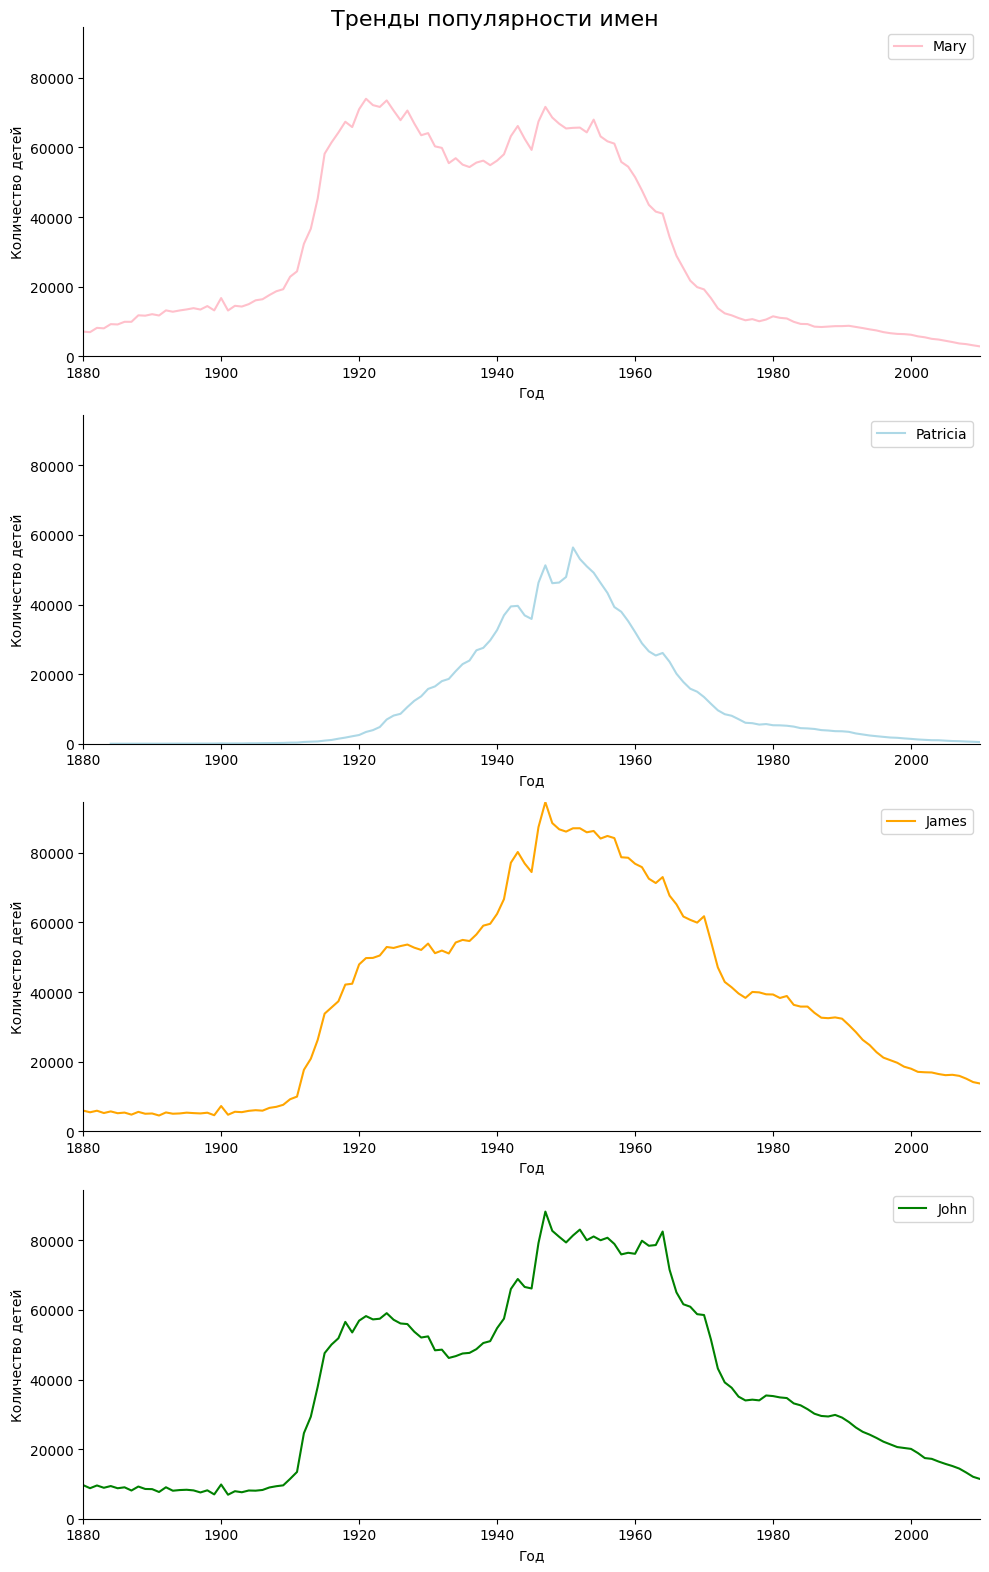

In [80]:
group = babies.groupby(['name', 'sex'])['number'].sum().reset_index()
boys = group[group['sex']=='M'].nlargest(2, 'number')
girls = group[group['sex']=='F'].nlargest(2, 'number')
baby_Mary = babies[(babies['name'] == 'Mary') & (babies['sex'] == 'F')].groupby('year')['number'].sum().reset_index()
baby_Patricia = babies[(babies['name'] == 'Patricia') & (babies['sex'] == 'F')].groupby('year')['number'].sum().reset_index()
baby_James = babies[(babies['name'] == 'James') & (babies['sex'] == 'M')].groupby('year')['number'].sum().reset_index()
baby_John = babies[(babies['name'] == 'John') & (babies['sex'] == 'M')].groupby('year')['number'].sum().reset_index()

fig, axis = plt.subplots(4, 1, figsize=(10, 16))
fig.suptitle('Тренды популярности имен', fontsize=16)

df = [baby_Mary, baby_Patricia, baby_James, baby_John]
names = ['Mary', 'Patricia', 'James', 'John']
colors = ['pink', 'lightblue', 'orange', 'green']
y_lim = max(baby_Mary['number'].max(), baby_Patricia['number'].max(), baby_James['number'].max(), baby_John['number'].max())
x_lim_max = max(baby_Mary['year'].max(), baby_Patricia['year'].max(), baby_James['year'].max(), baby_John['year'].max())
x_lim_min = min(baby_Mary['year'].min(), baby_Patricia['year'].min(), baby_James['year'].min(), baby_John['year'].min())

for i in range(4):
    axis[i].plot(df[i]['year'], df[i]['number'], color=colors[i], label=names[i])
    axis[i].set_xlabel('Год')
    axis[i].set_ylabel('Количество детей')
    axis[i].legend()
    axis[i].spines['top'].set_visible(False)
    axis[i].spines['right'].set_visible(False)
    axis[i].set_ylim(0, y_lim)
    axis[i].set_xlim(x_lim_min, x_lim_max)

plt.tight_layout()
plt.show()


Как мы видим, наибольшее число детей, родившихся с такими именами, было в период с 1910 до 1960 года. Возможно, это связано с войнами :)